## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Yvonne Ryan

Student ID: 21208298

<hr style="border:2px solid gray"> </hr>

## Imports

In [126]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [127]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [128]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [163]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [130]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

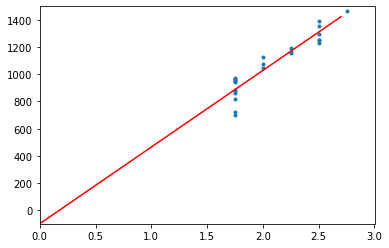

In [131]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task.

### Solution

#### 1. Matrix Operations
First, we define 3 matrix operations: Transpose, Multiply and Invert. 

##### 1.1 Transpose:
Transposing a matrix "swaps" the indices of the rows and the indices of the columns: i.e. element $A_{ij}$ of a matrix $A$ becomes element $A_{ji}$ in the transpose of $A$, written $A^{\mathsf{T}}$. For example:
$$A = \begin{bmatrix} a & b\\c & d \end{bmatrix} \Rightarrow A^{\mathsf{T}} = \begin{bmatrix} a & c\\b & d \end{bmatrix}$$

In the next code block, we define the function *matrix_tran* to perform the transpose operation:

In [196]:
def matrix_tran(A):
    '''
    Calculates the transpose of a matrix A.
    ''' 
    
    try:
        # Store the row & column counts in new variables for ease of use
        n_rows, n_cols = len(A), len(A[0])

        # Append the elements of A to a single list in the transposed order
        element_list = []
        for i in range(0, n_cols):
            for j in range(0, n_rows):
                element_list.append(A[j][i])

        # Split the list of elements into new lists corresponding to each row of 
        # the transposed matrix; append these to a list T
        T = []
        for i in range(0, len(element_list), n_rows):
            n = i + n_rows
            T.append(element_list[i:n])

        # Return the newly-constructed transpose of A
        return T
    
    except (TypeError, ValueError):
        print('Error calculating transpose: All matrix elements must be numeric.')

    except (IndexError):
        print('Error calculating transpose: Input must be a list of lists.')
        

##### 1.2 Multiply:
Multiplying two matrices $A$ and $B$ produces a matrix $C$, where each element $C_{ij}$ is calculated by taking the dot product of row $i$ in $A$ with column $j$ in $B$. Note that this requires that the number of rows in $A$ equal the number of rows in $B$. For example:

$$A = \begin{bmatrix} a & b\\c & d \end{bmatrix}\text{, } B= \begin{bmatrix} e & f\\g & h \end{bmatrix} \Rightarrow AB = C = \begin{bmatrix} ae + bg & af + bh\\ce + dg & cf + dh \end{bmatrix}$$

In the next code block, we define the function *matrix_mult* to perform the matrix multiplication operation.

In [197]:
def matrix_mult(A,B):
    '''
    Calculates the product of 2 matrices.
    '''
    
    # Check that input matrix dimensions are compatible for matrix multiplication   
    if len(A[0]) == len(B):
        
        # Create an empty list of lists to hold the resulting product
        # The number of sublists equals the number of rows in the final product
        AB = [ [] for x in range(0, len(A))]

        # Perform the multiplication operation
        # Iterate by row index of A and column index of B to select 
        # the correct element ij in the product AB
        for i in range(0, len(A)):
            for j in range(0, len(B[0])):
                
                # Calculate each element ij in the product AB
                term = 0
                for k in range(0, len(B)):
                    try:
                        term += A[i][k] * B[k][j]
                    except (TypeError, ValueError):
                        print('Error calculating product: All matrix elements must be numeric.')
                    except (IndexError):
                        print('Error calculating product: Input must be a list of lists.')
                    
                # Append the new term to the correct row in the output matrix
                AB[i].append(term)
        
        return AB 

    # If the matrix dimensions are incompatible, print string for user
    else:
        print("Matrix dimensions not suitable for calculating product.\nThe no. of columns in the left-hand matrix must match the no. of rows in the right-hand matrix.")

##### 1.3. Inverse:
The inverse $A^{-1}$ of an invertible matrix $A$ is defined as the matrix with which $A$ may be multiplied to produce the identity matrix $I$, i.e. $AA^{-1} = A^{-1}A = I$. Not all matrices are invertible. The inverse of a 2x2 invertible matrix may be found as follows:

$$A = \begin{bmatrix} a & b\\c & d \end{bmatrix}\Rightarrow A^{-1} = \frac{1}{\text{det}\left(A\right)} \begin{bmatrix} d & -b\\-c & a \end{bmatrix}$$

This definition includes the determinant of the matrix, $\text{det}\left(A\right)$, which is a scalar value given by:

$$\text{det}\left(A\right) = \begin{vmatrix} a & b\\c & d \end{vmatrix} = | ad - bc | $$

In the next code block, we define the function *matrix_inv* to perform the matrix multiplication operation.

In [198]:
def matrix_inv(A):
    '''
    Calculates the inverse of a 2x2 matrix.
    '''
    
    try:
        if len(A) == 2 and len(A[0]) == 2 and len(A[1]) == 2:
            # Define a subfunction to calculate the determinant, to use in inverse calculation
            def det(A):
                '''
                Calculates the determinant of a 2x2 matrix.
                '''
                return float(A[0][0]*A[1][1]) - (A[0][1]*A[1][0])

            # Calculate the inverse
            # Create a new matrix corresponding to the inverse before multiplying by 1/determinant
            A_inv = [[A[1][1], -1 * A[0][1]], [-1 * A[1][0], A[0][0]]]

            # Iterate through each element & multiply each by 1/determinant
            for i in range(0,len(A_inv)):
                for j in range(0,len(A_inv[0])):
                    A_inv[i][j] *= det(A)**(-1)

        else:
            print('Error calculating inverse: Input must be a 2x2 matrix.')
            
    except (TypeError, ValueError):
        print('Error calculating inverse: All matrix elements must be numeric.')

    except (IndexError):
        print('Error calculating inverse: Input must be a list of lists.')
    
                
    return A_inv

#### Linear Regression Functions
Now we can reproduce the functions *linreg_weights* and *linreg_predict* using the three matrix operation functions.

##### 2.1 Fit
First, we define the function *fit*, which calculates the weight vector $\overrightarrow{w} = \begin{bmatrix} w_1\\ w_2 \end{bmatrix}$

The weight vector elements are such that the product of the $n$ x 2 matrix of input data $X$ with $\overrightarrow{w}$ produces the $n$ x 1 vector of output data $\overrightarrow{y}$. The weight vector $\overrightarrow{w}$ is derived from this relationship as follows:

$$ X \overrightarrow{w} = \overrightarrow{y} $$
$$ \Rightarrow X^{\mathsf{T}}X  \overrightarrow{w} = X^{\mathsf{T}} \overrightarrow{y} $$
$$ \Rightarrow \overrightarrow{w} =  \left(X^{\mathsf{T}}X\right)^{-1}  X^{\mathsf{T}} \overrightarrow{y} $$

$\overrightarrow{w}$ may then be used with a new set of input data to produce a new, 'predicted' set of outputs.

The next code block implements the last line of the above derivation to calculate the weight vector, using the *matrix_tran*, *matrix_mult* and *matrix_inv* functions.

In [199]:
def fit(X,y):
    '''
    Calculate weights for the linear regression.
    '''  
    # Perform the calculation in one step and return the result
    return matrix_mult(matrix_inv(matrix_mult(matrix_tran(X),X)), matrix_mult(matrix_tran(X), y))

##### 2.2 Predict

Next we define a function to apply the weights vector $\overrightarrow{w}$ to an input dataset $X$, again an $n$ x 2 matrix. This produces an $n$ x 1 vector of predicted outputs, $\overrightarrow{y}$.

In [200]:
def predict(w,X):
    '''
    Calculate predicted outputs based on weights vector w and input dataset X.
    '''
    
    # Create empty list to hold outputs
    y = []
    
    # Iterate through each row in input matrix X
    for x in X:
        # Convert the matrix representation of the row (list of lists) into vector representation (list)
        list_x = []
        for val in x:
            list_x.append(float(val))
        
        # Calculate the predicted output y for this input vector x
        # Note that x is also transposed here as it is the wrong orientation when read from X 
        y.append(matrix_mult(matrix_tran(w), matrix_tran([x]))[0])
    
    return(y)

##### 2.3 Weight Parameters

Next we define a small function to return the weight parameters $w_1$ and $w_2$ from the *fit* function.

In [201]:
def get_params(w):
    '''
    A simple function to return the weights found by the fit function.
    Takes the weight vector w as input, i.e. the vector produced by the 
    fit function. 
    '''
    # Select the elements from the input vector and return these
    return w[0][0], w[1][0]

#### 3. Other Functions 

##### 3.1 Matrix Printing 
The following function *matrix_print* enables user-readable printing of matrix output. Given an input matrix, it returns a correctly-formatted string which, when printed, displays the matrix in a legible way, similar to how Python prints numpy matrices.

In [202]:
def matrix_print(A):
    '''
    Returns a string representation of matrix A formatted for improved readability.
    '''
    
    # If A only has one row, the full string can be constructed in one step
    if len(A) == 1:
        string = '[{}]'.format(A[0])
        
    # If A has more than one row, construct the string row-by-row
    else:
        string = '[{}\n'.format(A[0])
        for i in range(1,len(A)-1):
            string += ' {}\n'.format(A[i])
        string += ' {}]'.format(A[-1])
    
    return string

### Testing

In [213]:
# Test matrices

# M is a 4x3 matrix
M = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]

# N is a 3x2 matrix
N = [[1,2],[3,4],[5,6]]

# P is a 3x3 matrix
P = [[4,5,6],[7,8,9],[10,11,12]]

# A is a 1x2 matrix
A = [[1,2]]

# B is a 2x1 matrix
B = [[2],[3]]

# C & D are 2x2 matrices
C = [[5, 10], [15, 20]]
D = [[1, 2], [3, 4]]

# F is a 2 x 2 matrix containing a string
F = [[5, 'b'], [15, 20]]

# G is a simple list
G = [1, 2, 3, 4, 5]

# H is a string
H = 'I am not a valid matrix'

In [205]:
# Demonstrate the matrix_print function

# Change the example matrix here:
matrix = M

print('Print raw list representation of a matrix: \n{}\n'.format(matrix))

print('Print the same matrix in readable manner: \n{}\n'.format(matrix_print(matrix)))

Print raw list representation of a matrix: 
[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

Print the same matrix in readable manner: 
[[1, 2, 3]
 [4, 5, 6]
 [7, 8, 9]
 [10, 11, 12]]



In [206]:
# Demonstrate the matrix_tran function. Format the printed output using matrix_print for legibility.

# Change the example matrix here:
matrix = N

print('Given the following matrix: \n{}\n'.format(matrix_print(matrix)))

print('Its transpose is: \n{}\n'.format(matrix_print(matrix_tran(matrix))))

Given the following matrix: 
[[1, 2]
 [3, 4]
 [5, 6]]

Its transpose is: 
[[1, 3, 5]
 [2, 4, 6]]



In [214]:
# Demonstrate the matrix_mult function. Format the printed output using matrix_print for legibility.

print('M = \n{}\n'.format(matrix_print(M)))
print('N = \n{}\n'.format(matrix_print(N)))
print('The product MN = \n{}\n'.format(matrix_print(matrix_mult(M,N))))

print('The product CD = \n{}\n'.format(matrix_print(matrix_mult(C,D))))

M = 
[[1, 2, 3]
 [4, 5, 6]
 [7, 8, 9]
 [10, 11, 12]]

N = 
[[1, 2]
 [3, 4]
 [5, 6]]

The product MN = 
[[22, 28]
 [49, 64]
 [76, 100]
 [103, 136]]

The product CD = 
[[35, 50]
 [75, 110]]



In [208]:
# Demonstrate the matrix_inv function. Format the printed output using matrix_print for legibility.

# Change the example matrix here:
matrix = C

print('Given the following matrix: \n{}\n'.format(matrix_print(matrix)))

print('Its inverse is: \n{}\n'.format(matrix_print(matrix_inv(matrix))))

Given the following matrix: 
[[5, 10]
 [15, 20]]

Its inverse is: 
[[-0.4, 0.2]
 [0.3, -0.1]]



In [209]:
# Compare the output from the fit function against output from linreg_weights

# Print the output from the fit function using inputs X and y
print('Output from fit function:\n{}\n'.format(matrix_print(fit(X,y))))

# Print the output from the provided linreg_weights function using the same inputs X and y
print('Output from linreg_weights function:\n{}\n'.format(linreg_weights(X,y)))

Output from fit function:
[[-99.46431881371245]
 [564.2038924930494]]

Output from linreg_weights function:
[[-99.46431881]
 [564.20389249]]



In [210]:
# Print the output from the predict function
print('Output from predict function:\n{}\n'.format(matrix_print(predict(fit(X,y),X))))

# Print the output from the provided linreg_predict function using the same inputs
print('Output from linreg_predict function:\n{}\n'.format(linreg_predict(linreg_weights(X,y),X)))

Output from predict function:
[[1452.0963855421733]
 [1311.045412418911]
 [1311.045412418911]
 [1311.045412418911]
 [1311.045412418911]
 [1311.045412418911]
 [1311.045412418911]
 [1169.9944392956486]
 [1169.9944392956486]
 [1169.9944392956486]
 [1028.9434661723863]
 [1028.9434661723863]
 [1028.9434661723863]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]]

Output from linreg_predict function:
[[1452.09638554]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1169.9944393 ]
 [1169.9944393 ]
 [1169.9944393 ]
 [1028.94346617]
 [1028.94346617]
 [1028.94346617]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]]



In [211]:
# Check that the get_params function works correctly with the fit function to return the weight parameters

# Assign the returned parameters to a pair of variables w1 & w2
w1, w2 = get_params(fit(X,y))

# Print the parameters
print("Weight parameter w1 is: {}.\nWeight parameter w2 is: {}.".format(w1, w2))

Weight parameter w1 is: -99.46431881371245.
Weight parameter w2 is: 564.2038924930494.


<hr style="border:2px solid gray"> </hr>

## Reflection

Write your reflection in below cell.